In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("autompg.csv",sep = ";")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [3]:
#1 Quantos exemplos há no dataset?
len(df)

406

In [4]:
#2 Quais os atributos existentes no dataset?
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'name'],
      dtype='object')

In [5]:
#3 Quais os nomes dos carros existentes no dataset?
df['name']

0              chevrolet chevelle malibu
1                      buick skylark 320
2                     plymouth satellite
3                          amc rebel sst
4                            ford torino
5                       ford galaxie 500
6                       chevrolet impala
7                      plymouth fury iii
8                       pontiac catalina
9                     amc ambassador dpl
10                  citroen ds-21 pallas
11      chevrolet chevelle concours (sw)
12                      ford torino (sw)
13               plymouth satellite (sw)
14                    amc rebel sst (sw)
15                   dodge challenger se
16                    plymouth 'cuda 340
17                 ford mustang boss 302
18                 chevrolet monte carlo
19               buick estate wagon (sw)
20                 toyota corona mark ii
21                       plymouth duster
22                            amc hornet
23                         ford maverick
24              

In [6]:
#4 Quais as características do 'chevrolet camaro'?
df.loc[df['name'] == "chevrolet camaro"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [7]:
#5 Qual a média de consumo, em galões por litro, dos carros existentes no dataset?
np.mean(df['mpg'])

23.514572864321615

In [8]:
#Preparação dos dados
#1 Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.
df.dropna(inplace=True)

In [9]:
#2 Exclua a coluna com os nomes dos carros
df.drop(['name'],axis = 1,inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [10]:
#3 Converta mpg para km/l sabendo que: 1 mpg = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão.
kml = [round(x*0.425,2) for x in df["mpg"]]

In [11]:
#4 Remova a coluna mpg e insira a coluna kml no dataset.
df['kml'] = kml
df.drop(['mpg'],axis = 1,inplace=True)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,kml
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,7.22


In [12]:
#Organização dos dados para treinamento
#1 Remova a coluna kml e atribua-a a uma variável Y
Y = df['kml']
df.drop(["kml"],axis = 1,inplace=True)

In [13]:
#2 Atribua os demais valores do dataset a uma variável X
X = df
X.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [14]:
#3 Efetue uma partição holdout 70/30 com o sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [15]:
#Treinamento de um modelo de regressão linear
#1 Importe o modelo da biblioteca sklearn
#2 Instancie o modelo com parâmetros padrão (default)
#3 Execute o algoritmo de treinamento com os dados de treino

regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Teste do modelo
#Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
#Atributos preditores: X_test[2:3]
#Atributo alvo: Y_test.iloc[2]
#Qual o resultado previsto para o modelo, dados estes atributos preditores?
teste1 = X_test[2:3]
resultado = regr.predict(teste1)
print(resultado, Y_test.iloc[2])

[13.7197975] 14.03


In [17]:
#Teste do modelo
#Obtenha o erro médio quadrático para todos os dados de teste
#Efetue a importação de mean_squared_error do pacote sklearn.metrics
#Trata-se do somatório do quadrado das diferenças entre valores previstos pelo modelo e observados na prática
#Quanto mais próximo de zero, melhor este resultado
Y_predito = regr.predict(X_test)
mse = mean_squared_error(Y_predito, Y_test)
mse

1.8870592888213953

In [18]:
#Obtenha o r^2 para os dados de teste
#Efetue a importação de r2_score do pacote sklearn.metrics
#Trata-se de um valor no intervalo [0,1]
#Quanto mais próximo de 1, melhor é o modelo
r2 = r2_score(Y_predito, Y_test)
r2

0.8242600798156898

In [19]:
#Obtendo e visualizando os resíduos
#Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.
residuos = []
for(x, y) in zip(Y_test, Y_predito):
    residuos.append((x-y)**2)
residuos

[3.554465185740532,
 0.8423631978164712,
 0.09622558969782789,
 0.019477502547072437,
 3.2981347716227885,
 3.345085111719343,
 1.565255152340554,
 0.6904368283778355,
 0.2706569883438231,
 0.002727396156773829,
 3.1390101321135147,
 20.99723879859287,
 3.854055334701753,
 9.400081672769028,
 1.8801855973463701,
 0.00046508429166497434,
 0.14921508876059342,
 0.12788586352351897,
 0.0003709293555609335,
 4.124630498902022,
 0.011758793533731143,
 0.1197213500273835,
 0.8901621747387002,
 0.3024470752116511,
 0.02785906658148454,
 0.2552844528626757,
 0.2992033556093068,
 0.4388244148274713,
 1.7269996728243573,
 2.7768542187527143,
 0.47802504673554347,
 7.708708237055498,
 0.04373559770251502,
 1.8154422034244961,
 0.9921208903798114,
 1.0165299199416862,
 0.005609713260418754,
 0.5702921355241294,
 2.311526437379455,
 0.0027593218172163336,
 2.6388313782754027,
 0.048442709176794704,
 0.02341299572652324,
 1.1760019061558655,
 3.878049935402019,
 3.818387374253503,
 1.623783144405624

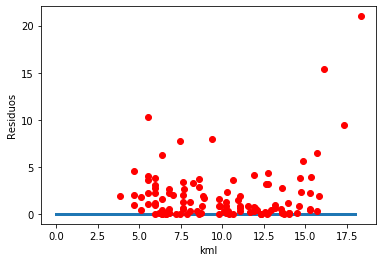

In [21]:
x = [0, int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test, residuos, 'ro')
plt.ylabel('Residuos')
plt.xlabel('kml')
plt.show()

In [24]:
#Testando K-Vizinhos Mais Próximos
#1 Efetue o treinamento do K-Vizinhos mais Próximos, considerando k =5
#2 Obtenha o MSE para o conjunto de testes
#3 Comparando com os resultados obtidos anteriormente, qual modelo melhor endereça esse problema?

kviz = KNeighborsRegressor(n_neighbors=5)
kviz.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [25]:
Y_preditoKViz = kviz.predict(X_test)
msekviz = mean_squared_error(Y_preditoKViz, Y_test)
msekviz

3.172153762711865